# Most Basic Bayesian Interview Question

---

Are you familiar with Bayesian inference?

> Yes!

Well then you must know **the law of total probability**! What's that?

> What proportion of students will pass this class $\Pr(pass)$ if you know $\Pr(pass|quick)$ as well as the distribution of $quick$?

Now what proportion of students who will pass the class answer this question quickly?

> The structure of this question is **_the most basic Bayesian interview question_**, but it requires some assumptions...

# Bayesian Terminology
---

## Bayes Theorem

\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
&={} \frac{{p(x, \theta)}}{\underset{\text{marginal likelihood}}{\displaystyle \int p(x|\theta)p(\theta) d\theta}} \textrm{ or }
\frac{{p(x, \theta)}}{\underset{\text{law of total probability}}{\displaystyle \sum_{k} p(x|\theta_k)p(\theta_k)}} =
\frac{\overset{joint}{p(x, \theta)}}{\underset{\text{normalizing constant}}{c}}
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

# Example
---
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} C^n_k\theta^{x}(1-\theta)^{n-x}\\
&&& \quad\; [\text{exponential family distribution if $n$ is known}]\\
&&& \quad\; [\text{What is this distribution? What is $C^n_k$?}]\\\\
\text{Prior} && p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\
&&& \quad\; [\text{$\alpha$ and $\beta$ are called }\textbf{hyperparameters}]\\
&&& \quad\; [\text{What is this distribution? What is $\Gamma(\cdot)$?}]\\\\
\text{Posterior} && p(\theta|x,n,\alpha,\beta) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \frac{C^n_k\theta^{x}(1-\theta)^{n-x}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} }{p(x)} \\
&&& = \;\texttt{What distribution parameterized how?}
\end{align*}



# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Lets denote passing the class as event A. \\
and answering this question quickly as event B. We want to find $P(A|B)$. \\
by conditional probability, $P(A|B) = \frac{P(A \cap B)}{P(B)}$ \\
$P(A|B) = \frac{0.6 \times 0.9}{0.6 \times 0.9 + 0.3 \times 0.1} = \frac{18}{19}$


Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \frac{ \frac{n!}{x_1! x_2! \cdots x_k!}\prod_{i=1}^k \theta_i^{x_i} \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{\alpha_i - 1} }{p(x)}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{proportional to Dirichlet distribution}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With parameterization of } x + \boldsymbol{\alpha}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



In [1]:
!pip install -U kaleido

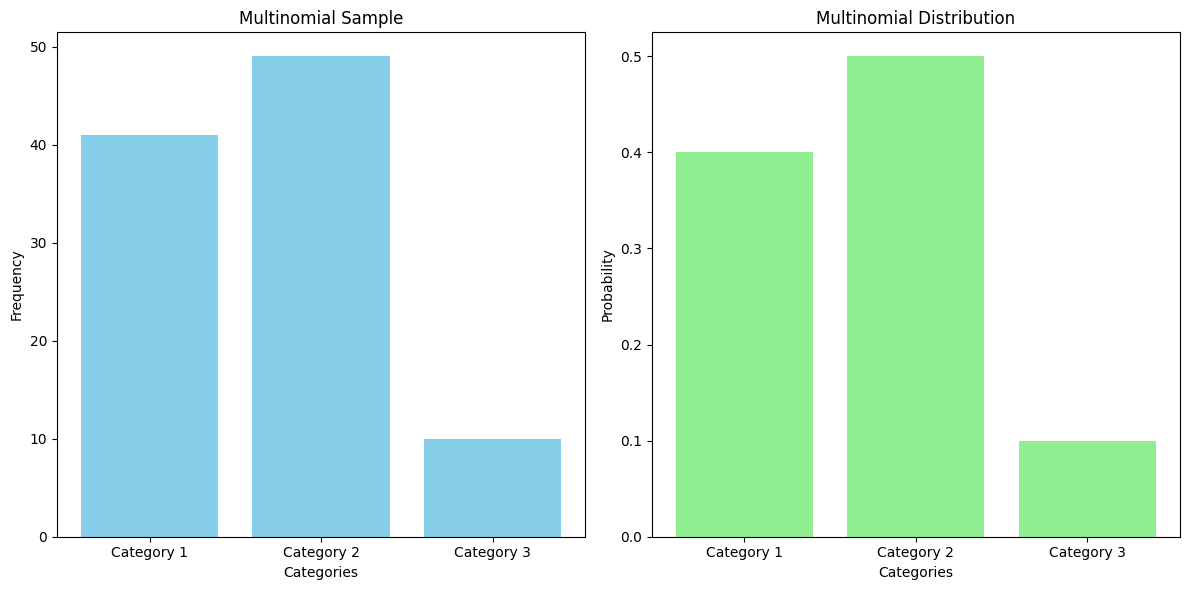

In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.figure_factory as ff
import kaleido

# sample from multinomial distribution
p = np.array([0.4, 0.5, 0.1])
n = 100
sample = np.random.multinomial(n, p, size=1)[0]

# Visualize the multinomial sample
# Plot the true probabilities
categories = ['Category 1', 'Category 2', 'Category 3']

# Plotting the theoretical probabilities
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the multinomial sample
axes[0].bar(categories, sample, color='skyblue')
axes[0].set_title('Multinomial Sample')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Frequency')

# Plot the probabilities
axes[1].bar(categories, p, color='lightgreen')
axes[1].set_title('Multinomial Distribution')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

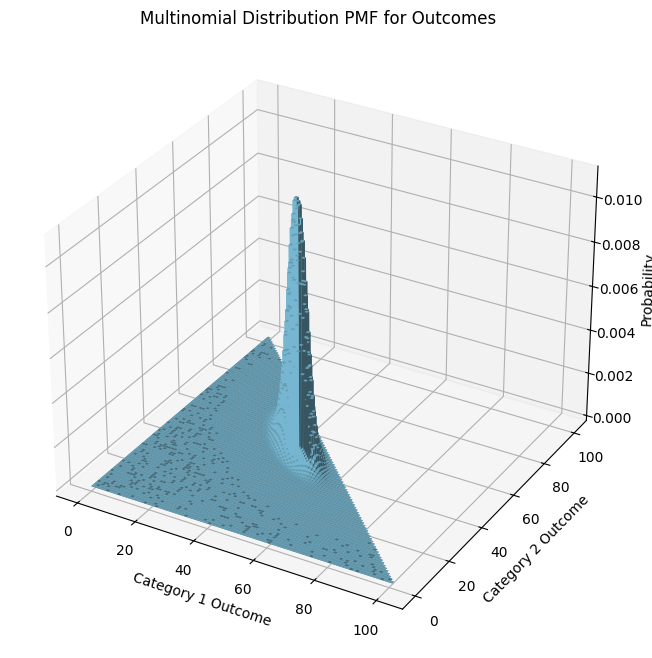

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import factorial

# Visualize the multinomial distribution
# Parameters for the multinomial distribution
p = np.array([0.4, 0.5, 0.1])  # Probabilities for the categories
n = 100  # Number of trials

# Function to compute the multinomial PMF for a given combination of frequencies
def multinomial_pmf(x, n, p):
    numerator = factorial(n)
    denominator = np.prod([factorial(xi) for xi in x])
    prob = numerator / denominator * np.prod([p[i]**x[i] for i in range(len(x))])
    return prob


combinations = []
probabilities = []

for x1 in range(n + 1):
    for x2 in range(n + 1 - x1):
            combinations.append((x1, x2, n - x1 - x2))
            prob = multinomial_pmf((x1, x2, n - x1 - x2), n, p)
            probabilities.append(prob)

# Prepare data for 3D plot
combinations = np.array(combinations)
probabilities = np.array(probabilities)

# 3D bar plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the bars
x_pos = combinations[:, 0]
y_pos = combinations[:, 1]
z_pos = np.zeros_like(x_pos)

dx = np.ones_like(x_pos)  # width of the bars
dy = np.ones_like(y_pos)  # depth of the bars
dz = probabilities  # height of the bars (probabilities)

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue')

# Labels and title
ax.set_xlabel('Category 1 Outcome')
ax.set_ylabel('Category 2 Outcome')
ax.set_zlabel('Probability')
ax.set_title('Multinomial Distribution PMF for Outcomes')

plt.show()

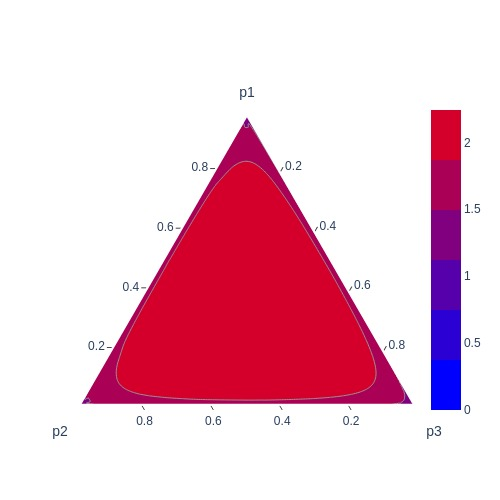

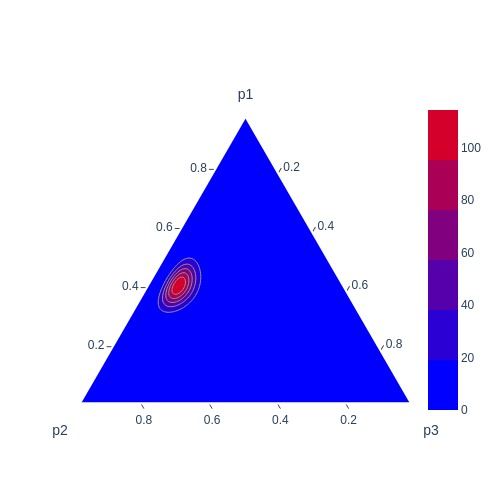

(None, None)

In [29]:
# Then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.
alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values

# Compute the posterior alpha values
alpha_posterior = alpha_prior + sample

# Compute Dirichlet distribution
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p1, p2, p3 = p1[p3 >= 0], p2[p3 >= 0], p3[p3 >= 0]  # Filter valid points where p3 >= 0
p = np.c_[p1, p2, p3]

# Compute posterior Dirichlet densities
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# plot for posterior
ternary_posterior_fig = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)

# Compute prior Dirichlet densities
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# plot for prior
ternary_prior_fig = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)

(ternary_prior_fig.show("jpg"),ternary_posterior_fig.show("jpg"))